<a href="https://colab.research.google.com/github/matheusbarroso/image_processing_with_python/blob/master/Chapter_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands-On Image Processing with Python

Matheus de Vasoncellos Barroso Solutions - 19/08/2020

## Chapter 2: Sampling, Fourier Transform and Convolution

First I'll start with the in chapter exercise:

### Use the lena_g image as input and apply asymmetric 3x3 ripple lernel $([[0, -1, \sqrt2], [1, 0, -1], [-\sqrt2, 1, 0])$ onto it separetely with `correlation2d()` and `convolution2d()`.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from scipy.signal import convolve2d, correlate2d

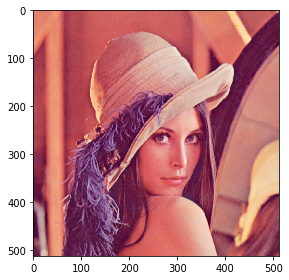

In [ ]:
lena_url = 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'
lena = imread(lena_url)
imshow(lena)

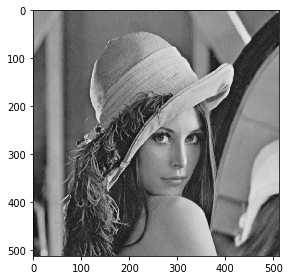

In [ ]:
lena = rgb2gray(lena)
imshow(lena);

In [ ]:
ripple_kernel = np.array([[0, -1, np.sqrt(2)],
                          [1, 0, -1],
                          [-np.sqrt(2), 1, 0]
                          ])

''

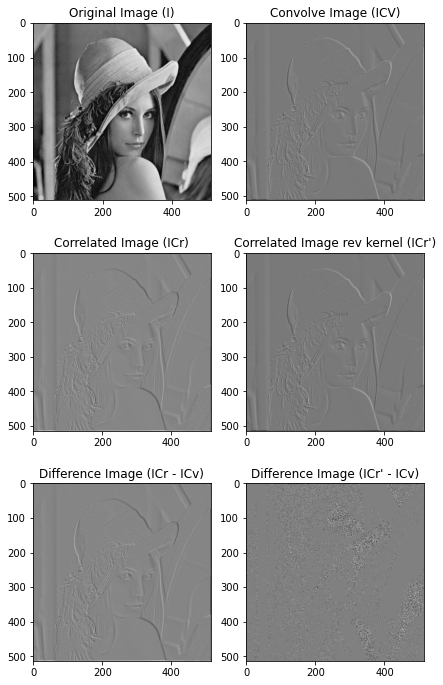

In [ ]:
# Convolve Image (ICV)
icv = convolve2d(lena, ripple_kernel)

# Correlated Image (ICr)
icr = correlate2d(lena, ripple_kernel)

# Correlated Image rev kernel (ICr')
icr2 = correlate2d(lena, np.fliplr(np.flipud(ripple_kernel)))

plt.figure(figsize=(7,12))
plt.subplot(3, 2, 1)
plt.imshow(lena, cmap='gray')
plt.title('Original Image (I)')
plt.subplot(3, 2, 2)
plt.imshow(icv, cmap='gray')
plt.title('Convolve Image (ICV)')
plt.subplot(3, 2, 3)
plt.imshow(icr, cmap='gray')
plt.title('Correlated Image (ICr)')
plt.subplot(3, 2, 4)
plt.imshow(icr2, cmap='gray')
plt.title("Correlated Image rev kernel (ICr')")
plt.subplot(3, 2, 5)
plt.imshow(icr - icv, cmap='gray')
plt.title('Difference Image (ICr - ICv)')
plt.subplot(3, 2, 6)
plt.imshow(icr2 - icv, cmap='gray')
plt.title("Difference Image (ICr' - ICv)")
;

### 1. Implement down-sampling with anti-aliasing using the Gaussian LPF (hint: reduce the house grayscale image four times, first by applying a Gaussian filter and then by filtering every other row and column. Compare the output images with and without pre-processing with LPF before down-sampling).



In [ ]:
from PIL import Image
from skimage.io import imread, imshow
from scipy.ndimage import gaussian_filter
from itertools import product

Text(0.5, 1.0, 'Downsized Gauss LPF Image')

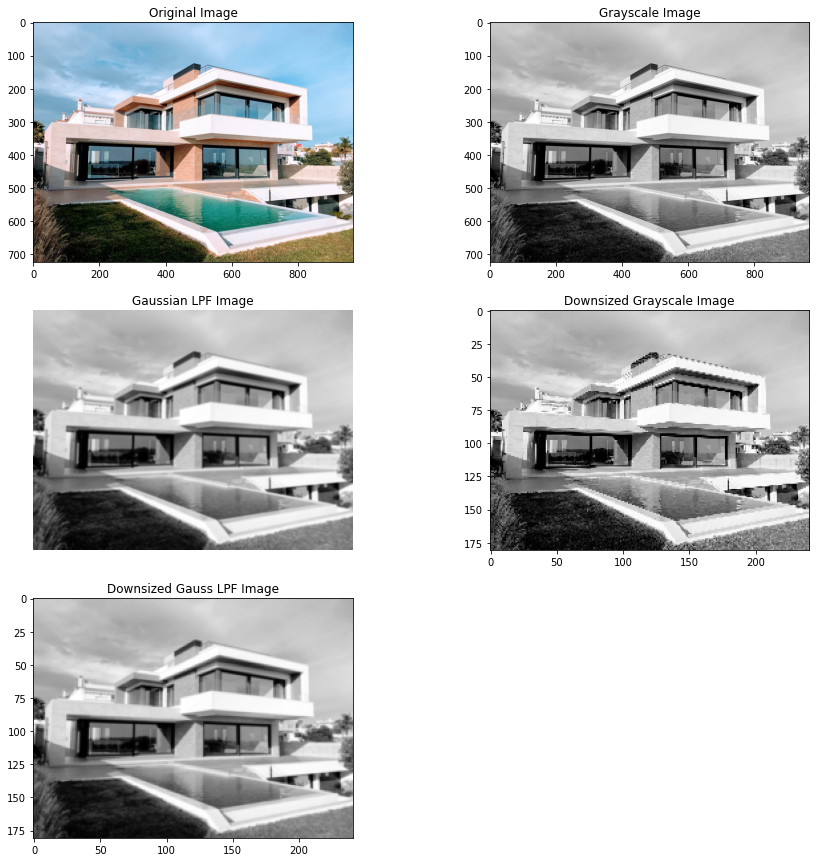

In [ ]:
house_url = 'https://images.unsplash.com/photo-1580587771525-78b9dba3b914?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=967&q=80'
house_original = imread(house_url)
house = rgb2gray(house_original)
house_gauss_lpf = gaussian_filter(house, sigma=2)

width, height = house.shape
down_factor = 4
width, height = width // 4, height // 4
down_house = np.zeros((width, height))

for w,h in product(*[range(width), range(height)]):
  down_house[w, h] = house[w * down_factor, h * down_factor]

down_lpf = np.zeros((width, height))

for w,h in product(*[range(width), range(height)]):
  down_lpf[w, h] = house_gauss_lpf[w * down_factor, h * down_factor]

nrow = 3
ncol = 2
plt.figure(figsize=(15, 15))

plt.subplot(nrow, ncol, 1)
plt.imshow(house_original)
plt.title('Original Image')
# plt.axis('off')

plt.subplot(nrow, ncol, 2)
plt.imshow(house, cmap='gray')
plt.title('Grayscale Image')
# plt.axis('off')

plt.subplot(nrow, ncol, 3)
plt.imshow(house_gauss_lpf, cmap='gray')
plt.title('Gaussian LPF Image')
plt.axis('off')

plt.subplot(nrow, ncol, 4)
plt.imshow(down_house, cmap='gray')
plt.title('Downsized Grayscale Image')
# plt.axis('off')

plt.subplot(nrow, ncol, 5)
plt.imshow(down_lpf, cmap='gray')
plt.title('Downsized Gauss LPF Image')
# plt.axis('off');

### 2. Use the FFT to up-sample an image: first double the size of the `lena` grayscale image by padding zero rows/columns at every alternate positions, then use the FFT followed by an LPF and then by the IFFT to get the otput image . Why does it work?




In [ ]:
import numpy.fft as fp

- First, reading the image:

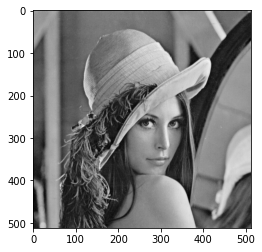

In [ ]:
lena_url = 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'
lena = imread(lena_url)
# lena = rgb2gray(lena)
lena = np.mean(lena, axis=2)
plt.gray()
plt.imshow(lena);

In [ ]:
width, height = lena.shape

In [ ]:
up_factor = 2

- Creating the new padded image:


In [ ]:
up_lena = np.zeros((width  * up_factor, height * up_factor))

In [ ]:
for w,h in product(*[range(width), range(height)]):
  up_lena[w * up_factor, h * up_factor] = lena[w, h]

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


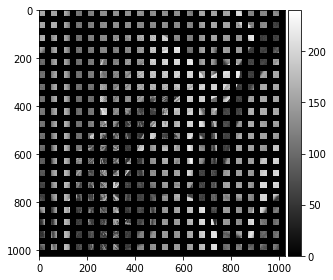

In [ ]:
imshow(up_lena, cmap='gray')

From the [pad](https://numpy.org/doc/stable/reference/generated/numpy.pad.html) documentation:

In [ ]:
def pad_with(vector, pad_width, iaxis, kwargs):
    vector = vector.copy() 
    pad_value = kwargs.get('padder', 0)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value
    return vector

The convolution $g(x, y)= f  \star K$ 


In [ ]:
width, height = up_lena.shape[:2]
# the LPF kernel
kernel = [[0.25, 0.5, 0.25], [0.5, 1, 0.5], [0.25, 0.5, 0.25]]
# enlarge the kernel to the shape of the image
kernel = np.pad(kernel, (((width-3)//2,(width-3)//2+1), ((height-3)//2,(height-3)//2+1)), pad_with)  

- Now, the FFT:

In [ ]:
fft_img = fp.fft2(up_lena)
fft_kernel = fp.fft2(fp.ifftshift(kernel))

- LPF:

In [ ]:
LPF = fft_img * fft_kernel

In [ ]:
up_lena = fp.ifft2(LPF)
# up_lena = fp.fft2(inverse)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


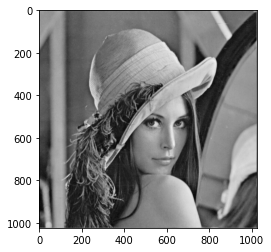

In [ ]:
plt.gray() 
plt.imshow(up_lena.astype(np.uint8)) 

### 3. Try to apply the Fourier transform and image reconstruction with a color (RGB) image. (Hint: apply the FFT for each channel separetely).

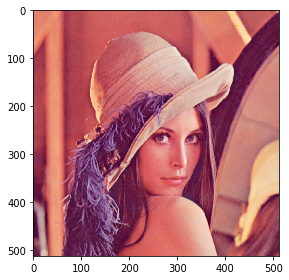

In [ ]:
lena_url = 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'
lena = imread(lena_url)
imshow(lena)

In [ ]:
lena.shape

(512, 512, 3)

In [ ]:
r, g, b = lena[:, : , 0], lena[:, : , 1], lena[:, : , 2]

In [ ]:
reconstructed_image = []

for channel in [r, g, b]:
    freq = fp.fft2(channel)
    img = fp.ifft2(freq).astype(np.uint8)
    reconstructed_image.append(np.clip(img, 0, 255))

img = np.dstack(reconstructed_image)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """


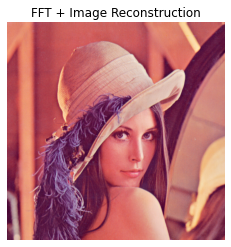

In [ ]:
plt.imshow(img)
plt.title('FFT + Image Reconstruction')
plt.axis('off');

### 4. Show (mathematically and with a 2D kernel example) that the Fourier transform of a Gaussian kernel is another Gaussian kernel.


We need to peform an complex integration on a bivariate gaussian distribution. I'll get back to this exercise later.


### 5. Use the `lena` image and the asymmetric ripple kernel to generate images wiith correlation and convolution. Show that output images are different. Now, flip the kernel twice (upside-down and left-right) and apply the correlatin with the flipped kernel-is the output image the same as the one obtained using the original kernel with convolution?

OBS: this exercise was solved in the beginning of the notebook.
